# **Sentence Transformers**

In [2]:
# USING DEFAULT PARSER for now
import json
with open('../parse_data/repo_to_prompts.json', 'r') as f:
    data = json.load(f)

all_prompts = []
for repo in data.keys():
    all_prompts.extend(data[repo])

(1127, 384)
(1127, 2)


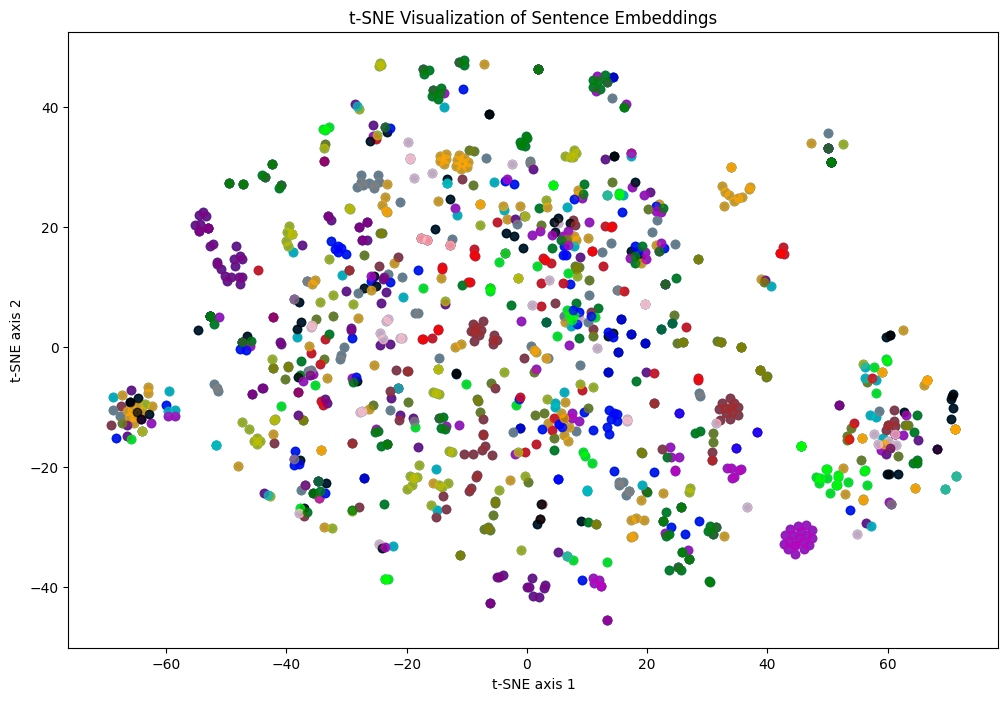

In [18]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np

# Your list of strings
##############################################################################################################
# Flatten the list of strings and create a corresponding list of colors
# Colors for each repo
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'lime', 'brown', 'pink', 'gray', 'olive']
all_strings = []
color_map = []
for repo_index, (repo, strings) in enumerate(data.items()):
    all_strings.extend(strings)
    # Wrap around the color list since there are more repos than colors
    color_map.extend([colors[repo_index % len(colors)]] * len(strings))
##############################################################################################################

# Step 1: Generate Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(all_strings)
embeddings = np.array(embeddings)
print(embeddings.shape)

# Step 2: Reduce Dimensionality with t-SNE
tsne = TSNE(n_components=2)
embeddings_reduced = tsne.fit_transform(embeddings)
print(embeddings_reduced.shape)

# Step 3: Plotting
x_coords = embeddings_reduced[:, 0]
y_coords = embeddings_reduced[:, 1]
plt.figure(figsize=(12, 8))
plt.scatter(x_coords, y_coords)

# Scatter plot with color mapping
for x, y, color in zip(x_coords, y_coords, color_map):
    plt.scatter(x, y, color=color, alpha=0.7)

plt.title('t-SNE Visualization of Sentence Embeddings')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()

### 🗨️ Semantic Textual Similarity

In [44]:
from sentence_transformers import SentenceTransformer, util

# Download model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# The sentences we'd like to compute similarity about
sentences = all_strings
sim_scores = [0] * len(sentences)

# Get embeddings of sentences
embeddings = model.encode(sentences)

# Compute similarities (takes 30 secs to go through 1100-ish prompts)
for i in range(len(sentences)):
    for j in range(len(sentences)):
        sim_scores[i] += util.cos_sim(embeddings[i], embeddings[j]).tolist()[0][0]

    sim_scores[i] /= len(sentences)
    if i % 100 == 0:
        print(i, end=" ")
print()

# Print the results
sorted_scores = sorted(((score, sentence) for sentence, score in zip(sentences, sim_scores)), reverse=True)
for score, sentence in sorted_scores:
    print(f"{score:.4f}", end=" ")

0 100 200 300 400 500 600 700 800 900 1000 1100 
0.3386 0.3360 0.3243 0.3243 0.3224 0.3212 0.3202 0.3174 0.3174 0.3174 0.3154 0.3146 0.3145 0.3128 0.3127 0.3121 0.3121 0.3120 0.3118 0.3118 0.3118 0.3118 0.3118 0.3118 0.3118 0.3118 0.3110 0.3107 0.3095 0.3094 0.3084 0.3081 0.3079 0.3079 0.3079 0.3078 0.3073 0.3072 0.3036 0.3018 0.3017 0.3017 0.3017 0.3013 0.2997 0.2979 0.2978 0.2977 0.2974 0.2971 0.2968 0.2955 0.2946 0.2931 0.2922 0.2916 0.2911 0.2903 0.2900 0.2900 0.2900 0.2900 0.2900 0.2900 0.2900 0.2897 0.2896 0.2891 0.2891 0.2890 0.2887 0.2885 0.2883 0.2883 0.2883 0.2883 0.2883 0.2883 0.2880 0.2880 0.2880 0.2874 0.2866 0.2866 0.2864 0.2864 0.2864 0.2855 0.2853 0.2853 0.2853 0.2851 0.2851 0.2851 0.2843 0.2842 0.2842 0.2842 0.2842 0.2838 0.2836 0.2836 0.2831 0.2830 0.2830 0.2830 0.2830 0.2830 0.2829 0.2827 0.2818 0.2816 0.2812 0.2804 0.2800 0.2798 0.2792 0.2792 0.2792 0.2792 0.2792 0.2784 0.2783 0.2783 0.2783 0.2778 0.2777 0.2777 0.2775 0.2775 0.2775 0.2775 0.2775 0.2774 0.2772 0.2772

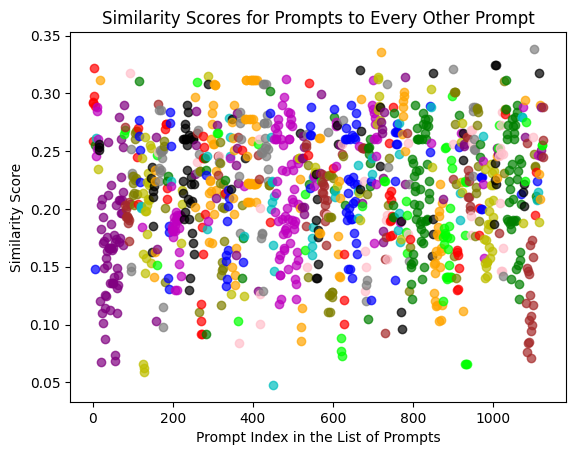

In [66]:
# Show the results visually
import matplotlib.pyplot as plt
import numpy as np

# Plot the scores
# plt.figure(figsize=(12, 8))
plt.title('Similarity Scores for Prompts to Every Other Prompt')
plt.xlabel('Prompt Index in the List of Prompts')
plt.ylabel('Similarity Score')

x_coords = np.arange(len(sentences))
y_coords = sim_scores

# Scatter plot with color mapping
for x, y, color in zip(x_coords, y_coords, color_map):
    plt.scatter(x, y, color=color, alpha=0.7)

plt.show()

### 🗨️ **Semantic Search**

In [71]:
# Queries and their embeddings
queries = ["Are you using Langchain?", "Are you using a chatbot?", "Are you an instructional or commanding prompt?"]
queries_embeddings = model.encode(queries)

# Find the top-2 corpus documents matching each query
hits = util.semantic_search(queries_embeddings, embeddings, top_k=2)

for i in range(len(queries)):
    print("\n======================\n")
    print("Query:", queries[i])

    for hit in hits[i]:
        print(sentences[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
        print()



Query: Are you using Langchain?
"""
    You are an expert programmer and problem-solver, tasked to answer any question about Langchain. Using the provided context, answer the user's question to the best of your ability using the resources provided.
    If you really don't know the answer, just say "Hmm, I'm not sure." Don't try to make up an answer.
    Anything between the following markdown blocks is retrieved from a knowledge bank, not part of the conversation with the user. 
    <context>
        {context} 
    <context/>""" (Score: 0.4403)

"""
    You are an expert programmer and problem-solver, tasked to answer any question about Langchain. Using the provided context, answer the user's question to the best of your ability using the resources provided.
    If you really don't know the answer, just say "Hmm, I'm not sure." Don't try to make up an answer.
    Anything between the following markdown blocks is retrieved from a knowledge bank, not part of the conversation with the u

### 🗨️ **Paraphrase Mining** (Just Messing around)

In [87]:
# Look for paraphrases
paraphrases = util.paraphrase_mining(model, sentences)
print(len(paraphrases))
# Print paraphrases
for paraphrase in paraphrases[:2]:
    score, i, j = paraphrase
    print("Score {:.4f} ---- {} ---- {}\n".format(score, sentences[i], sentences[j]))

79284
Score 1.0000 ---- """The following is a conversation between an AI and a human regarding implementation of a robot software.
    
    Summarize the conversation in bullet point format by extracting the most important information exchanged within the conversation.
    
    Please include any mentioned numbers in the summary, as they are important to the conversation.

    Conversation:
    {input}""" ---- """The following is a conversation between an AI and a human regarding implementation of a robot software.

    Summarize the conversation in bullet point format by extracting the most important information exchanged within the conversation.

    Please include any mentioned numbers in the summary, as they are important to the conversation.

    Conversation:
    {input}"""

Score 1.0000 ---- """
        You are an expert in creating strategies for getting a four-hour workday. You are a productivity coach and you have helped many people achieve a four-hour workday.
        You're

### 😶‍🌫️ **Word Cloud for All Prompts**

Why? Cuz, why not? lol

In [5]:
from wordcloud import WordCloud

# Get text
text = " ".join(all_prompts).lower()

# Create a word cloud object
wc = WordCloud()

# Generate the word cloud
wc.generate(text)

# Save the word cloud
wc.to_file("all_prompts.png")